In [69]:
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [71]:
# Recordings (folder 'data'):
# unit5062_2025_July_26th_night_pt1.json
# unit5062_2025_July_26th_night_pt2.json

In [73]:
def plot_noise_from_file(filename, title = "Noise Levels Over Time"):
    # Load JSON data from file
    with open(filename, 'r') as f:
        raw_data = json.load(f)

    # Parse nested JSON string inside 'historyJson'
    nested = json.loads(raw_data["historyJson"])

    # Extract and convert sample data safely (skip empty strings)
    samples = [float(s) for s in nested["storageVolume"].split(";") if s.strip()]

    # Timing info
    start_ms = nested["startTime"]
    duration_ms = nested["duration"]
    sample_count = len(samples)
    interval_ms = duration_ms / sample_count

    # Generate timestamps for x-axis
    timestamps = [
        datetime.fromtimestamp(start_ms / 1000.0) + timedelta(milliseconds=i * interval_ms)
        for i in range(sample_count)
    ]

    # Plotting
    plt.figure(figsize=(14, 5))
    plt.plot(timestamps, samples, linewidth=0.8)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("dB (decibels)")
    plt.ylim(30,70)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

In [75]:
def get_recording_time_info(filename):
    with open(filename, 'r') as f:
        raw_data = json.load(f)

    nested = json.loads(raw_data["historyJson"])

    # Extract time info
    start_ms = nested["startTime"]
    duration_ms = nested["duration"]

    # Convert to datetime objects
    start_dt = datetime.fromtimestamp(start_ms / 1000.0)
    end_dt = start_dt + timedelta(milliseconds=duration_ms)

    # Return formatted date and times
    return {
        "date": start_dt.date().isoformat(),
        "start_time": start_dt.time().isoformat(timespec='seconds'),
        "end_time": end_dt.time().isoformat(timespec='seconds')
    }

# Example:
# info = get_recording_time_info("history0.json")
# print(info)



July 26th, 2025 - Unit 5062


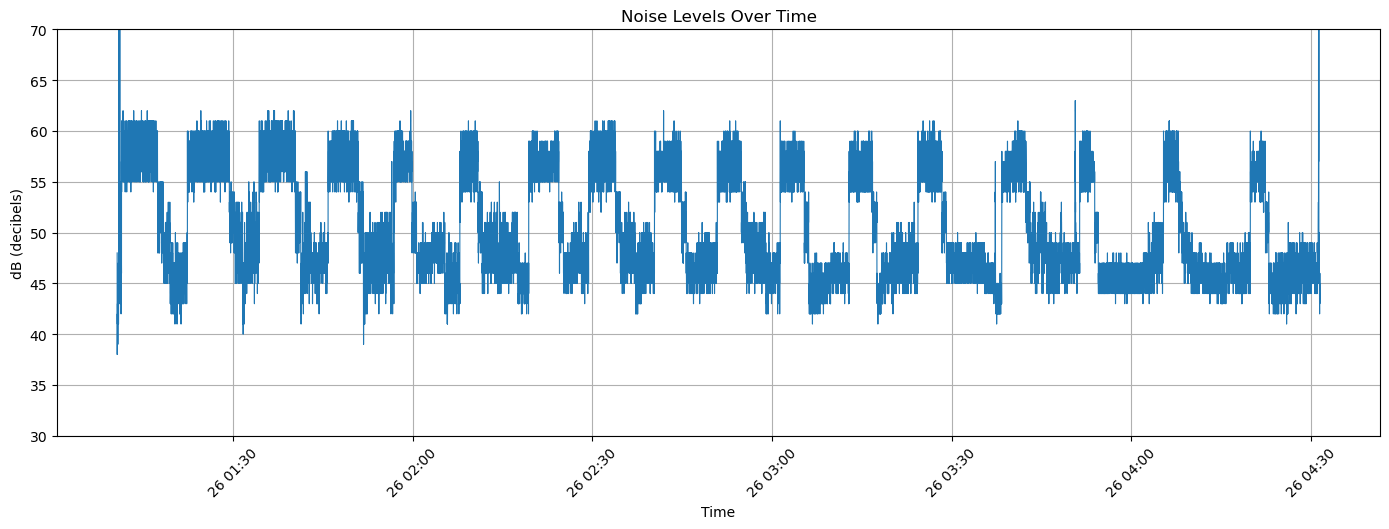

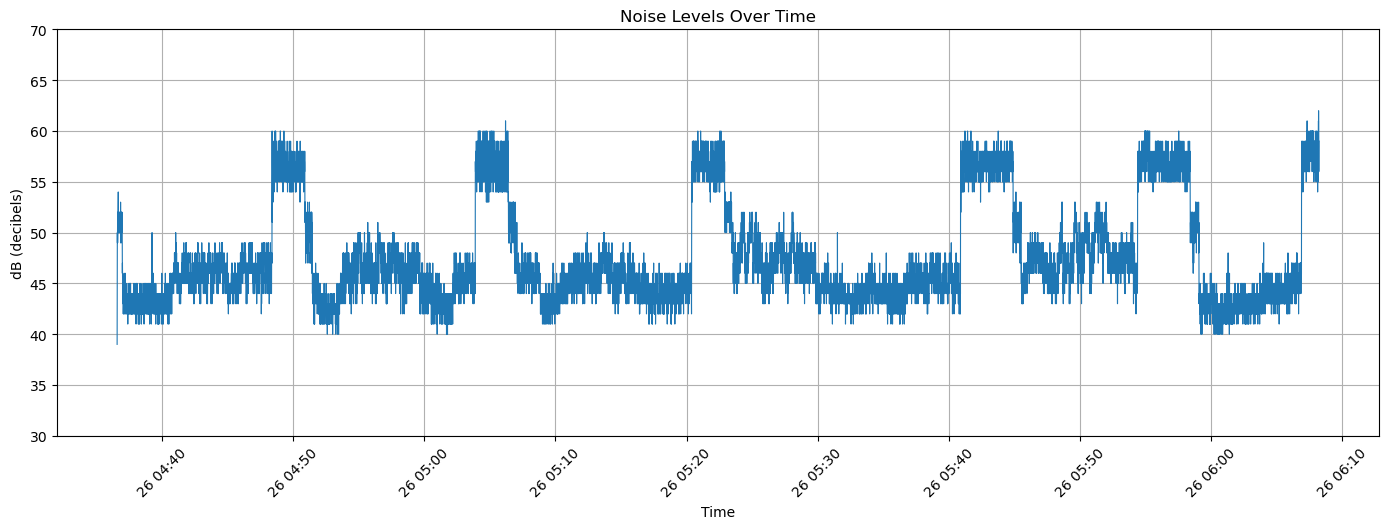


July 27th, 2025 - Unit 5062


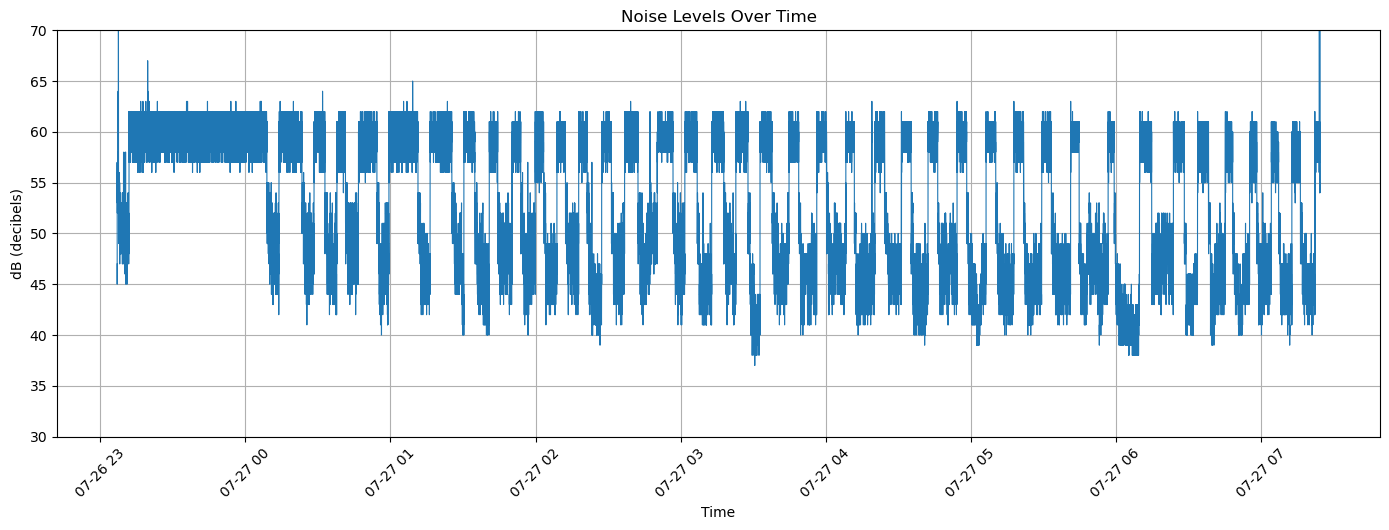

In [77]:
print('\nJuly 26th, 2025 - Unit 5062')
plot_noise_from_file('data/unit5062_2025_July_26th_night_pt1.json')
plot_noise_from_file('data/unit5062_2025_July_26th_night_pt2.json')
print('\nJuly 27th, 2025 - Unit 5062')
plot_noise_from_file('data/unit5062_2025_July_27th_night.json')

# Unit 2063 over night

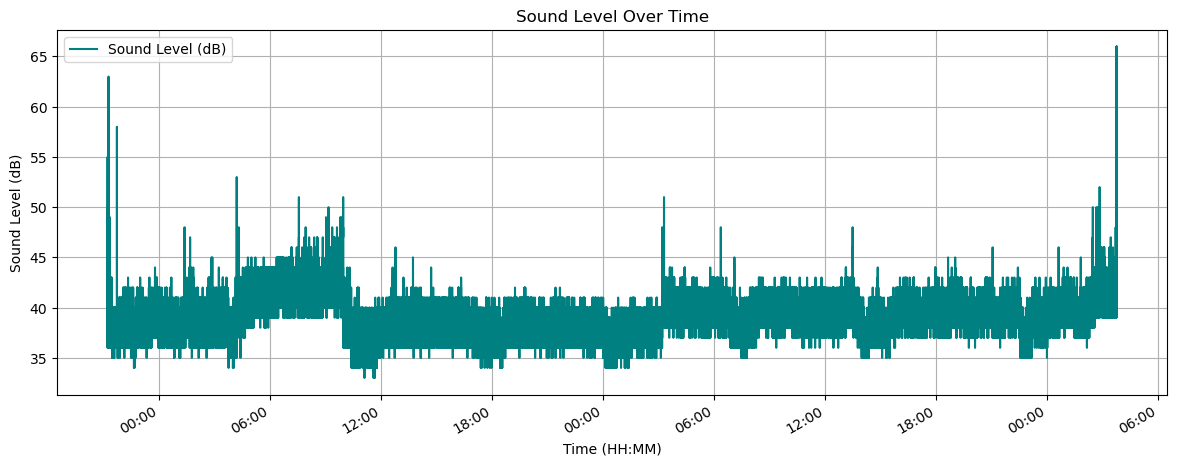

In [80]:


# Load JSON
with open('data/15.json') as f:
    data = json.load(f)

# Parse and clean sound levels
raw_values = data['storageVolume'].split(';')
sound_levels = [int(v) for v in raw_values if v.strip().isdigit()]

# Get start time and create time axis
start_time_ms = data.get('startTime')
start_datetime = datetime.fromtimestamp(start_time_ms / 1000)

timestamps = [start_datetime + timedelta(seconds=i) for i in range(len(sound_levels))]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(timestamps, sound_levels, label="Sound Level (dB)", color='teal')

# Format x-axis as HH:MM
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel("Time (HH:MM)")
plt.ylabel("Sound Level (dB)")
plt.title("Sound Level Over Time")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.gcf().autofmt_xdate()

plt.show()


In [81]:


# Load JSON file
with open("data/15.json", "r") as f:
    data = json.load(f)

# Extract and format metadata
metadata = {
    "id": data.get("id"),
    "startTime (raw)": data.get("startTime"),
    "startTime (local)": datetime.fromtimestamp(data.get("startTime") / 1000).strftime("%Y-%m-%d %H:%M:%S"),
    "duration_ms": data.get("duration"),
    "duration_hours": round(data.get("duration") / (1000 * 60 * 60), 2),
    "avgValue_dB": data.get("avgValue"),
    "minValue_dB": data.get("minValue"),
    "maxValue_dB": data.get("maxValue"),
    "status": data.get("statu"),  # typo in original field name
    "recording_path": data.get("path"),
    "num_samples": len([v for v in data.get("storageVolume", "").split(";") if v.strip().isdigit()]),
    "num_marks": len(data.get("mark", "").split(";")) if data.get("mark") else 0
}

# Print nicely
for key, value in metadata.items():
    print(f"{key}: {value}")


id: 15
startTime (raw): 1753675956226
startTime (local): 2025-07-27 21:12:36
duration_ms: 39270300
duration_hours: 10.91
avgValue_dB: 39.013374
minValue_dB: 33.0
maxValue_dB: 66.0
status: Quiet Whisper
recording_path: /storage/emulated/0/Android/data/app.tools.soundmeter.decibel.noisedetector/files/sound_recorder/Recording_250728_1.amr
num_samples: 196353
num_marks: 6


# Unit 5062 daytime (~ 2 hrs)

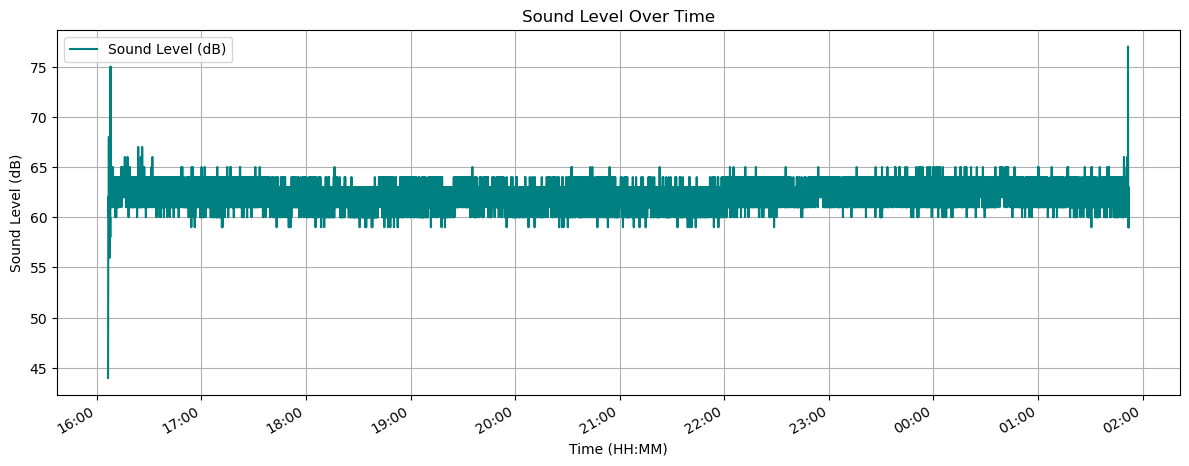

In [85]:


# Load JSON
with open('data/14.json') as f:
    data = json.load(f)

# Parse and clean sound levels
raw_values = data['storageVolume'].split(';')
sound_levels = [int(v) for v in raw_values if v.strip().isdigit()]

# Get start time and create time axis
start_time_ms = data.get('startTime')
start_datetime = datetime.fromtimestamp(start_time_ms / 1000)

timestamps = [start_datetime + timedelta(seconds=i) for i in range(len(sound_levels))]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(timestamps, sound_levels, label="Sound Level (dB)", color='teal')

# Format x-axis as HH:MM
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel("Time (HH:MM)")
plt.ylabel("Sound Level (dB)")
plt.title("Sound Level Over Time")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.gcf().autofmt_xdate()

plt.show()


In [87]:


# Load JSON file
with open("data/14.json", "r") as f:
    data = json.load(f)

# Extract and format metadata
metadata = {
    "id": data.get("id"),
    "startTime (raw)": data.get("startTime"),
    "startTime (local)": datetime.fromtimestamp(data.get("startTime") / 1000).strftime("%Y-%m-%d %H:%M:%S"),
    "duration_ms": data.get("duration"),
    "duration_hours": round(data.get("duration") / (1000 * 60 * 60), 2),
    "avgValue_dB": data.get("avgValue"),
    "minValue_dB": data.get("minValue"),
    "maxValue_dB": data.get("maxValue"),
    "status": data.get("statu"),  # typo in original field name
    "recording_path": data.get("path"),
    "num_samples": len([v for v in data.get("storageVolume", "").split(";") if v.strip().isdigit()]),
    "num_marks": len(data.get("mark", "").split(";")) if data.get("mark") else 0
}

# Print nicely
for key, value in metadata.items():
    print(f"{key}: {value}")


id: 14
startTime (raw): 1753657584655
startTime (local): 2025-07-27 16:06:24
duration_ms: 7029720
duration_hours: 1.95
avgValue_dB: 62.26948
minValue_dB: 44.0
maxValue_dB: 77.0
status: Conversation
recording_path: /storage/emulated/0/Android/data/app.tools.soundmeter.decibel.noisedetector/files/sound_recorder/Recording_250727_2.amr
num_samples: 35150
num_marks: 3
